Imports do dataset.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist


In [ ]:
# Carrega os dados do MNIST
#São duas tuplas, uma com os dados de treino e outra com os dados de teste.
#Cada tupla é composta pelas imagens (X) e seus respectivos rótulos (Y), em formato escalar (inteiro que representa o dígito da imagem)
(x_train, y_train),(x_test, y_test) = mnist.load_data()
n = 10 #número de classes

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


O exemplo abaixo mostrar as 10 primeiras imagens de treino e teste do MNIST:

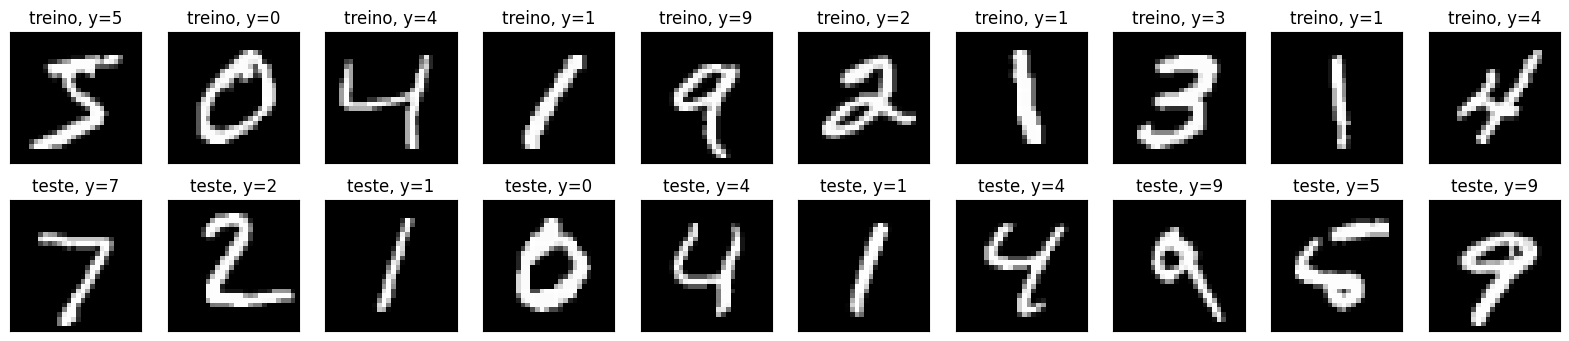

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(n):
  # treino
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i])
  plt.title(f"treino, y={y_train[i]}")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # teste
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(x_test[i])
  plt.title(f"teste, y={y_test[i]}")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Os rótulos das classes dos dígitos do dataset MNIST são números inteiros de 0 a 9. Podemos converter esses valores para vetores com one-hot-encoding. Esta operação é realizada na célula abaixo para os rótulos do conjunto de treinamento do do conjunto de teste.

Esta operação não é necessária, se utilizarmos como função de custo a esparse_categorical_cross_entropy

In [ ]:
# Converter para codificação one-hot dos labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=n)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=n)
#Não é necessário se utilizar como função de custo esparse_categorical_cross_entropy

A celula abaixo tem a definição de um multi-layer perceptron (MLP) pra aplicar no MNIST.



In [ ]:
def get_mnist_mlp():
  network = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),       # 1 camada de entrada (achatando a entrada pra imagem 28x28 virar um vetor unidimensional)
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(n, activation='softmax') # 1 camada de saida com 10 neuronios (1 por classe). A variável n já definida armazena o número de classes
  ])

  network.compile(optimizer='adam',                        # otimizador
                loss='categorical_crossentropy',   # entropia cruzada adaptada para multiplas classes
                metrics=['accuracy'])                     # métrica final de desempenho (nao modifique!)

  network.summary()

  return network


ModuleNotFoundError: No module named 'keras.api._v2'

A célula abaixo tem um exemplo de execução do MLP no MNIST.

Exercício: rodar as seguintes configurações:

- 1 camada oculta com 10 neuronios, 10 epocas de treinamento
- 2 camadas ocultas com 10 neuronios, 10 epocas de treinamento



In [ ]:
network = get_mnist_mlp()
network.fit(x_train, y_train, epochs=5)    # treina a rede. batch size padrão é 32
loss, accuracy = network.evaluate(x_test, y_test)            # avalia a rede



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 2.0661 - accuracy: 0.7444
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4981 - accuracy: 0.8716
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.344

Agora vamos rodar uma rede convolucional.

A celula abaixo tem a definição de uma rede neural convolucional (CNN) pra rodar no MNIST.



In [ ]:
def get_mnist_cnn():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),    # 1 camada de convolução: 16 filtros 3x3, stride padrão (1,1), ativação relu
      tf.keras.layers.MaxPool2D((2,2), ),                                                 # max pooling 2x2
      tf.keras.layers.Flatten(),                                                        # achatar p/ se ajustar à MLP

      tf.keras.layers.Dense(n, activation='softmax')                                   # 1 camada de saida com 10 neuronios
  ])

  model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

  network.summary()

  return model

A celula abaixo tem um exemplo de execucao da CNN no MNIST.

Exercício: rodar as seguintes configurações:

- 1 camada oculta pós convoluções com 10 neuronios, 10 epocas de treinamento
- mais uma camada de convolução com 8 filtros 3x3 e mais uma max-pooling 2x2; 1 camada oculta pós convoluções com 10 neuronios, 10 epocas de treinamento


In [ ]:
network = get_mnist_cnn()
network.fit(x_train, y_train, epochs=5)    # treina a rede
loss, accuracy = network.evaluate(x_test, y_test)            # avalia a rede



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7631 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1020 - accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.074

O que podemos notar comparando o número de parâmetros e a performance da MLP e da CNN?

Para utilizar a rede neural treinada para prever o rótulo de uma instância arbitrária, utilizamos o método **predict**.


1/1 [==============================] - 0s 118ms/step


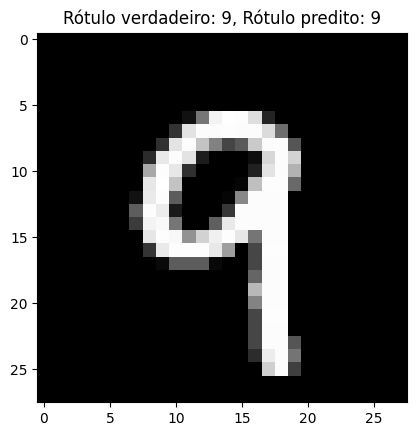

In [ ]:
# Escolhendo uma amostra aleatória do dataset de teste.
random_index = np.random.randint(0, len(x_test))#Gera índice entre 0 e o número de amostras
random_sample = x_test[random_index]#Obtém a amostra com o índice alatório
true_label_one_hot = y_test[random_index]#Obtém o rótulo esperado

#Utiliza a rede treinada para prever a classe
#np.expand_dims é necessário para adicionar uma dimensão adicional à amostra, no caso da rede esperar lotes de dados de entrada
predicted_probs = network.predict(np.expand_dims(random_sample, axis=0))
predicted_label_one_hot = predicted_probs[0]

# Convert the predicted one-hot label back to a scalar label
predicted_label = np.argmax(predicted_label_one_hot)
true_label = np.argmax(true_label_one_hot)

# Exibe a imagem aleatória selecionada com o seu rótulo previsto e o verdadeiro
plt.imshow(random_sample, cmap='gray')
plt.title(f"Rótulo verdadeiro: {true_label}, Rótulo predito: {predicted_label}")
plt.show()